# Introduction to the Simulation/Modelling Cross-Border Payment Transactions

This is a short introduction to a quick model of how money can be transferred between accounts in the auction-based system outlined throughout the paper. The encoded simulation below utilizes an exchange platform between three different countries and three different currencies, which can be visualized in the matrices shown below.



> **Note**: The code below organizes countries into three separate matrices. Each row represents a different currency (in this case, the order is USD, EUR, and JPY) while the first column represents the current concentration of currency/desired concentration of currency and the second column represents the final allocation of currency after the exchange is performed. In the sample matrices below, the theory of the exhchange can be observed prior to running the simulation through the code.

## Establishing the Price Matrix 🧪

**PriceMatrix** is a class dedicated to the structure of each country's current capital in the system across currency both prior to and after the exchange takes place. In the diagram below, we can observe how data is structured for Country 1 (c1 in the code) in the image below. 

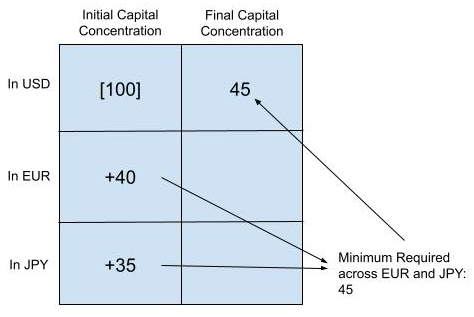

We can also observe the matrices for Countries 2 and 3, labeled c2 and c3 respectively in the code, below: 

In the case of c2, the 50 represents the minimum requirement acroos USD and JPY

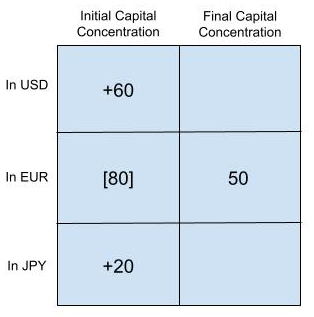 

In the case of c3, the 50 represents the minimum requirement acroos USD and EUR

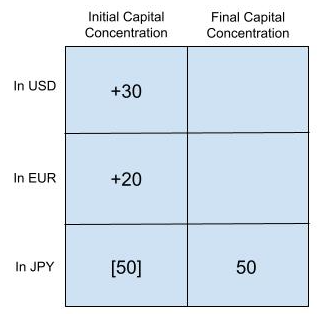

## Encoding the Price Matrix Class 📓

**Price Matrices** are encoded as a series of 2-dimensional arrays, wherein there are specific methods dedicated to filling in the values of the individual countries (given that they are operating with different currency trades). The methods themselves are labeled/commented for their individual purposes, and can be observed in the code cell below:

In [6]:
class PriceMatrix:
    
    def __init__(self):
    #Method for initializing the structure of the initial price matrix
        self.price_matrix = [0, 0, 0]
        i = 0
        while i < 3:
            internal_matrix = [0, 0]
            self.price_matrix[i] = internal_matrix
            i += 1

    def fill_c1_matrix(self, row_num_list):
    #Fills the matrix for the first country (c1) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i < 2:
                self.price_matrix[0][i] = num
            elif i == 2:
                self.price_matrix[1][0] = num
            else:
                self.price_matrix[2][0] = num
            i += 1

    def fill_c2_matrix(self, row_num_list):
    #Fills the matrix for the second country (c2) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i == 0:
                self.price_matrix[0][0] = num
            elif i == 3:
                self.price_matrix[2][0] = num
            else:
                self.price_matrix[1][i-1] = num
            i += 1

    def fill_c3_matrix(self, row_num_list):
    #Fills the matrix for the third country (c3) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i == 0:
                self.price_matrix[0][0] = num
            elif i == 1:
                self.price_matrix[1][0] = num
            elif i == 2:
                self.price_matrix[2][0] = num
            elif i == 3:
                self.price_matrix[2][1] = num
            i += 1

    def replace_value(self, value, row, col):
    #Replaces any given value within any of the price matrices
        for i in range(len(self.price_matrix)):
            for j in range(len(self.price_matrix[i])):
                if i == row and j == col:
                    self.price_matrix[i][j] = value

    def __str__(self):
    #Creates the parameters for the visual output of a price matrix
        return '\n'.join([''.join(['{:2}'.format(item) for item in row]) 
      for row in self.price_matrix])

## Using the simulation 

This explanation will take the users through how to best utilize the code presented in this notebook. 

### Entering input values for the respective countries
 
The first step are the sections of code that hope to take information from the individual users that are in the three player system. For the purposes of filling out the matrix, we need four numbers from each user. In this case, we ask for a few values 


In [ ]:
if __name__ == '__main__':
    c1_offer = float(input("Enter the amount of usd willing to be traded"))
    c1_minimum = float(input("Enter the price minimum"))
    c1_leftover1 = float(input("Enter the desired amount of euros"))
    c1_leftover2 = float(input("Enter the desired amount of yen"))
    c1_euro_ratio = float(c1_leftover1) / (float(c1_leftover1) + float(c1_leftover2))
    c1_yen_ratio = float(c1_leftover2) / (float(c1_leftover1) + float(c1_leftover2))
    c1_pricematrix = PriceMatrix()
    num_list1 = [c1_offer, c1_minimum, c1_leftover1, c1_leftover2]
    c1_pricematrix.fill_c1_matrix(num_list1)
    